In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
X,y = digits['data'], digits['target']
X.shape, y.shape

((1797, 64), (1797,))

In [3]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
NO0 = X[0].reshape(8,8)

In [5]:
NO0

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

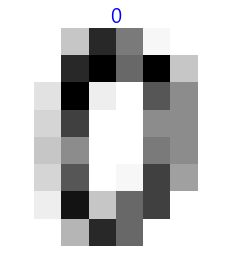

In [6]:
plt.imshow(NO0, cmap = 'Greys')
plt.axis('off')
plt.title(y[0])
plt.show()

In [7]:
y

array([0, 1, 2, ..., 8, 9, 8])

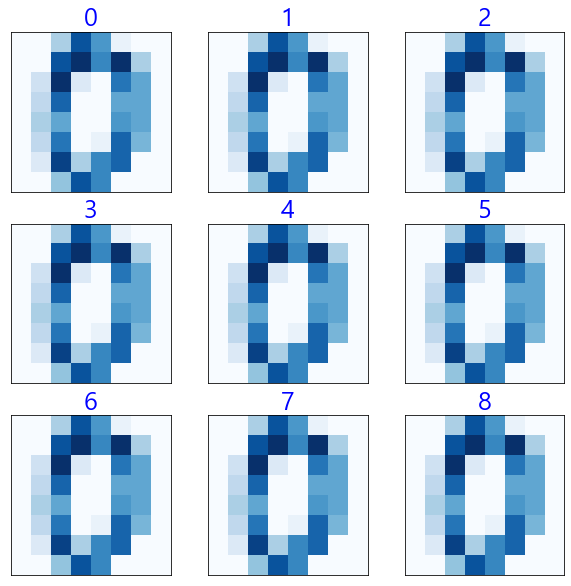

In [8]:
plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X[0].reshape(8,8), cmap = 'Blues')
    plt.xticks([])
    plt.yticks([])
    plt.title(y[i], fontdict = {'fontsize':25})
    
plt.show()

In [9]:
cnt = np.unique(y, return_counts = True)

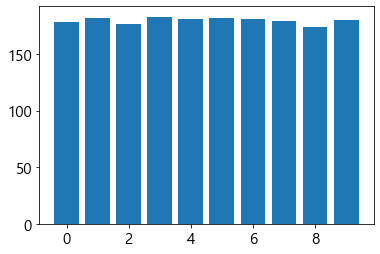

In [10]:
plt.bar(cnt[0],cnt[1])
plt.show()

### 불균형 데이터셋으로 만들기
- y를 9와 나머지로 변경한다. # 9 와 9가 아닌것을 찾게 하고 싶어: 불균형ㄷ
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [11]:
y = y==9
cnt2 = np.unique(y, return_counts = True)
cnt2

(array([False,  True]), array([1617,  180], dtype=int64))

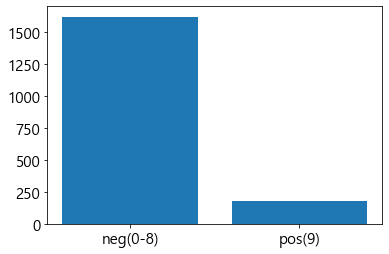

In [12]:
plt.bar(cnt2[0], cnt2[1])
plt.xticks([0,1], labels = ['neg(0-8)', 'pos(9)'])
plt.show()

In [13]:
import numpy as np

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify= y)
print(np.unique(y_train, return_counts = True)[1]/y_train.size)

print(np.unique(y_test, return_counts = True)[1]/y_test.size)

[0.89977728 0.10022272]
[0.9 0.1]


In [15]:
np.unique(y_train, return_counts = True)

(array([False,  True]), array([1212,  135], dtype=int64))

In [16]:
from sklearn.base import BaseEstimator
class MyModel(BaseEstimator):
    def fit(self, X, y1):
        cnt = np.unique(y1, return_counts = True)
        max_idx = cnt[1].argmax()
        self.pred = cnt[0][max_idx]
        
    def predict(self, X):
        return np.full(shape=(X.shape[0], 1), fill_value = self.pred)

In [17]:
model = MyModel()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8997772828507795, 0.9)

In [19]:
model = MyModel()
model.fit(X, digits['target'])
pred_X = model.predict(X)
accuracy_score(digits['target'], pred_X)

0.1018363939899833

In [20]:
np.unique(pred_X)

array([3])

In [21]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.8997772828507795
0.9


In [23]:
accuracy_score(digits['target'], pred_X)

0.1018363939899833

## 이진 분류 평가점수
- ### Accuracy (정확도) 
    - 전체 데이터 중에 맞게 예측한 것의 비율
- ### Recall/Sensitivity(재현율/민감도) : 양성이 중심
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- ### Precision(정밀도) : 양성이 중심
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- ### F1 점수 : 둘다 어느정도 높아야 FI점수가 높음(리콜과 프리션은 서로 TRADE OFF 관계)
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.
    
### 기타 : 양성을 찾는 것이 중요해서(모델을 이용해 찾고싶은 것) 따라서 음성에 관한 지표가 기타
- ### Specificity(특이도): recall의 음성버전-> 음성인데 음성으로 잘 맞춘게 뭐냐
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - TNR(True Negative Rate) 라고도 한다.
- ### Fall out(위양성률) : 음성인데 틀리게 예측한건 몇개냐
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $ Fall-Out(FPF) = \cfrac{FP}{TN+FP}$`mm

###   Dummy 모델 혼동행렬
> plot_confusion_matrix함수: 버전 2.1.3에서 추가됨. 없다고 에러나는 경우 업데이트 필요 `pip install scikit-learn --upgrade`

In [24]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [25]:
print('train confusion matrix')
print(confusion_matrix(y_train, pred_train))
print('test confusion matrix')
print(confusion_matrix(y_test, pred_test))

train confusion matrix
[[1212    0]
 [ 135    0]]
test confusion matrix
[[405   0]
 [ 45   0]]


In [26]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy = 'most_frequent')
dummy_model.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

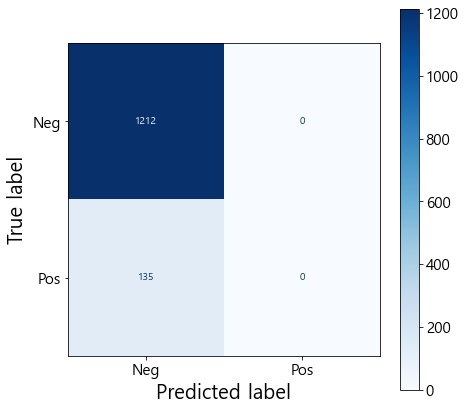

In [27]:
fig,ax = plt.subplots(1,1, figsize = (7,7))

plot_confusion_matrix(dummy_model, X_train, y_train, display_labels = ['Neg','Pos'],
                    cmap = 'Blues', ax = ax)

plt.show()

In [28]:
print('accuracy')
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

accuracy


(0.8997772828507795, 0.9)

In [29]:
print('recall')
recall_score(y_train, pred_train), recall_score(y_test, pred_test)

recall


(0.0, 0.0)

In [30]:
print('precision')
precision_score(y_train, pred_train), precision_score(y_test, pred_test)

precision


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [31]:
print('f1 _score')

f1_score(y_train, pred_train), f1_score(y_test, pred_test)

f1 _score


(0.0, 0.0)

In [74]:
### 머신러닝 모델을 이용해 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(max_depth = 3)
rf = RandomForestClassifier(n_estimators = 200)

tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)
pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

In [75]:
print(confusion_matrix(y_train, pred_train_tree))
print(confusion_matrix(y_test, pred_test_tree))

[[1171   41]
 [  23  112]]
[[391  14]
 [ 10  35]]


In [59]:
print(confusion_matrix(y_train, pred_train_rf))
print(confusion_matrix(y_test, pred_test_rf))

[[1212    0]
 [   0  135]]
[[405   0]
 [ 12  33]]


In [60]:
accuracy_score(y_test, pred_test_tree), recall_score(y_test, pred_test_tree), precision_score(y_test, pred_test_tree), f1_score(y_test, pred_test_tree)

(0.9466666666666667,
 0.7777777777777778,
 0.7142857142857143,
 0.7446808510638298)

In [61]:
print('randomforest 모델 평가지표')

randomforest 모델 평가지표


In [62]:
accuracy_score(y_test, pred_test_rf), recall_score(y_test, pred_test_rf), precision_score(y_test, pred_test_rf), f1_score(y_test, pred_test_rf)

(0.9733333333333334, 0.7333333333333333, 1.0, 0.846153846153846)

In [63]:
### classification_report()

from sklearn.metrics import classification_report
result = classification_report(y_test, pred_test_rf) #target_names = ['not9', '9'])
print(result)

              precision    recall  f1-score   support

       False       0.97      1.00      0.99       405
        True       1.00      0.73      0.85        45

    accuracy                           0.97       450
   macro avg       0.99      0.87      0.92       450
weighted avg       0.97      0.97      0.97       450



## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

#### 재현율이 더 중요한 경우 :실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델 ->파지티브를 틸리면 안돼!! 암환자를 놓치는 것
- 재현율을 높이기 위해 : 예를들어 사기인지 아닌지 아리까리해 평소에 쓰던것보다 많이쓴것 같긴한데 엄청쓴건 아니야 -> 이때 사기로 판단. 아리까리하면 POSITIVE로 하자
    - 전체 모두를 POSITIVE로 예측해버리면 재현율 1로 올라가(정확도는 떨어지지만)
    - 공식을 보면 FN이 낮아져야 재현율 상승 네가티브로 예측했는데 틀린것이니까 POSITIVE로 에측하면 되지


#### 정밀도가 더 중요한 경우 Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정 - 스팸이 P, 정상메일이 N인데 정상메일을 스팸으로 예측하면 안돼
- 아리까리하면 NEGATIVE로 해라, 그러면 정밀도가 올라가
    - 공식으로 하면  FP가 낮아져야, 즉 포시티브로 잘못 예측한게 작아져야 하니까 POSITIVE로 예측하지마


#### 재현율(RECALL)과 정밀도는 상충관계

## 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- 임계값 : 모델이 분류의 답을 결정할 때 기준값
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다. (ex: 암환자 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 암환자로 예측하게 된다.)
    
### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 음의 상관관계를 가진다.**
- 임계값을 변화시켰을때 재현율과 위양성율(Fall-Out/FPR)은 양의 상관관계를 가진다.


In [64]:
p = tree.predict(X_test[:3])
p

array([False, False, False])

In [65]:
p = tree.predict_proba(X_test[:5])
p

array([[0.99156627, 0.00843373],
       [0.99156627, 0.00843373],
       [0.99156627, 0.00843373],
       [0.99156627, 0.00843373],
       [0.99156627, 0.00843373]])

In [66]:
X_test

array([[ 0.,  0.,  5., ...,  2.,  0.,  0.],
       [ 0.,  1., 15., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 11.,  2.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2., 11., ..., 14.,  2.,  0.],
       [ 0.,  0.,  2., ..., 10.,  0.,  0.]])

In [67]:
# 임계값 변화에 다른 recall precision 변화 해보기임계값 변화에 다른 recall precision 변화 해보기

In [68]:
from sklearn.metrics import precision_recall_curve
pos_proba = tree.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)
precisions.shape, recalls.shape, thresholds.shape

((8,), (8,), (7,))

In [69]:
tree.predict_proba(X_test)[:,1]

array([0.00843373, 0.00843373, 0.00843373, 0.00843373, 0.00843373,
       0.0297619 , 0.00843373, 0.00843373, 0.00843373, 0.00843373,
       0.00843373, 0.00843373, 0.03846154, 0.00843373, 0.00843373,
       0.00843373, 0.00843373, 0.00843373, 0.00843373, 0.77165354,
       0.00843373, 0.00843373, 0.00843373, 0.0297619 , 0.02173913,
       0.00843373, 0.00843373, 0.00843373, 0.00843373, 0.77165354,
       0.00843373, 0.77165354, 0.00843373, 0.00843373, 0.07258065,
       0.00843373, 0.00843373, 0.00843373, 0.77165354, 0.00843373,
       0.00843373, 0.00843373, 0.00843373, 0.00843373, 0.02173913,
       0.0297619 , 0.07258065, 0.00843373, 0.00843373, 0.00843373,
       0.00843373, 0.00843373, 0.07258065, 0.00843373, 0.00843373,
       0.0297619 , 0.00843373, 0.0297619 , 0.00843373, 0.00843373,
       0.00843373, 0.00843373, 0.00843373, 0.03846154, 0.00843373,
       0.00843373, 0.07258065, 0.00843373, 0.00843373, 0.00843373,
       0.03846154, 0.00843373, 0.00843373, 0.52      , 0.07258

In [50]:
import pandas as pd
pd.DataFrame({
    'threshold':thresholds,
    'precision':precisions[:-1],
    'recall':recalls[:-1]
})

,threshold,precision,recall
0,0.008434,0.100000,1.000000
1,0.021739,0.233918,0.888889
2,0.029762,0.251613,0.866667
3,0.038462,0.365385,0.844444
4,0.072581,0.413043,0.844444
5,0.520000,0.714286,0.777778
6,0.771654,0.738095,0.688889


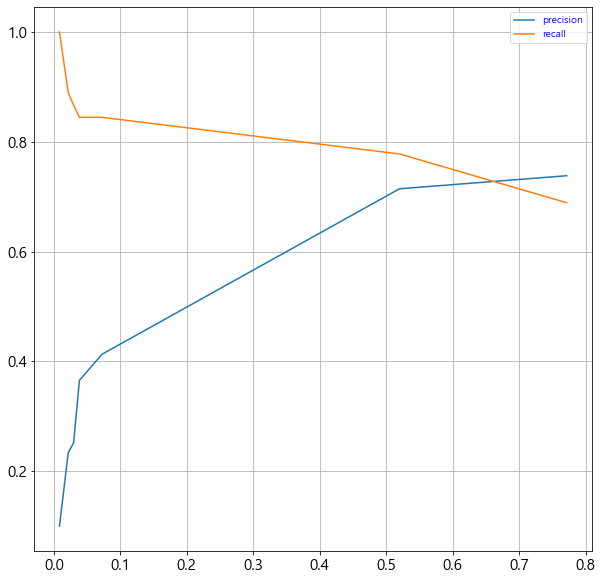

In [51]:
plt.figure(figsize=(10,10))
plt.plot(thresholds, precisions[:-1], label = 'precision')
plt.plot(thresholds, recalls[:-1], label = 'recall')

plt.legend()
plt.grid(True)
plt.show()

### Binarizer - 임계값 변경
- Transformer로 양성 여부를 선택하는 임계값을 변경할 수 있다.

In [77]:
from sklearn.preprocessing import Binarizer
example = [[-0.3, 0.5, 0.7, 0.4, 0.6]]

bi = Binarizer(threshold = 0.8)#threshold = 0.8) # 임계값 이상이면 true
bi.fit(example)
bi.transform(example)

array([[0., 0., 0., 0., 0.]])

In [78]:
Binarizer?

In [85]:
#머신러닝 모델에 적용머신러닝 모델에 적용

pos_proba = tree.predict_proba(X_test)
pos_proba

binarizer = Binarizer(threshold = 0.7)
binarizer.fit(pos_proba)
predict = binarizer.transform(pos_proba)[:,1]
predict

accuracy_score(pred_test_tree, predict)

#그게 우연히 잘 나눠졌을 수 있어요. 사용한 모델이 큰게 아니고 정제가 잘 되있는 모델이어서 결과가 대체적으로 잘나와요.


0.9844444444444445

In [88]:
pos_proba = tree.predict_proba(X_test)
pos_proba

binarizer = Binarizer(threshold= 0.5)
binarizer.fit(pos_proba)
predict = binarizer.transform(pos_proba)[:,-1]
predict

accuracy_score(pred_test_tree, predict)
recall_score(y_test, predict), precision_score(y_test, predict)

(0.7777777777777778, 0.7142857142857143)

## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- 0~1사이의 모든 임계값에 대하여 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 0 → 1 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score : 0~1사이 값이 나올 수 있고, 1로갈 수록 좋은 거. 1이면 recall, precision 다 1인 것.-> 이런 모델은 없다고 봐도 무방
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
![image.png](attachment:image.png)   
- recall이 크면 precision은 낮기 때문에 우하향의 형태로 나올 수 밖에 없음. recall이 올라가면서 precision은 떨어짐.
- precision이 안좋은 모델 : ㄴ자로 그래프 나올때
- recall이 올라가는데도 precision은 계속 높은 값을 유지 recall을 올려도 precision 적게떨어짐.: ㄱ자로 그래프 유지 -> AP SCORE 면적 넓어짐 : 면적 넓은게 좋다고 한 이유

In [91]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score

In [97]:
pos_proba = tree.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)
#positive에 대한 확률값만 볼꺼니까

thresholds = np.append(thresholds, 1)
precisions.shape, recalls.shape, thresholds.shape

((8,), (8,), (8,))

In [94]:
pos_proba = tree.predict_proba(X_test)[:,1]
pos_proba

array([0.00843373, 0.00843373, 0.00843373, 0.00843373, 0.00843373,
       0.0297619 , 0.00843373, 0.00843373, 0.00843373, 0.00843373,
       0.00843373, 0.00843373, 0.03846154, 0.00843373, 0.00843373,
       0.00843373, 0.00843373, 0.00843373, 0.00843373, 0.77165354,
       0.00843373, 0.00843373, 0.00843373, 0.0297619 , 0.02173913,
       0.00843373, 0.00843373, 0.00843373, 0.00843373, 0.77165354,
       0.00843373, 0.77165354, 0.00843373, 0.00843373, 0.07258065,
       0.00843373, 0.00843373, 0.00843373, 0.77165354, 0.00843373,
       0.00843373, 0.00843373, 0.00843373, 0.00843373, 0.02173913,
       0.0297619 , 0.07258065, 0.00843373, 0.00843373, 0.00843373,
       0.00843373, 0.00843373, 0.07258065, 0.00843373, 0.00843373,
       0.0297619 , 0.00843373, 0.0297619 , 0.00843373, 0.00843373,
       0.00843373, 0.00843373, 0.00843373, 0.03846154, 0.00843373,
       0.00843373, 0.07258065, 0.00843373, 0.00843373, 0.00843373,
       0.03846154, 0.00843373, 0.00843373, 0.52      , 0.07258

In [98]:
thresholds

array([0.00843373, 0.02173913, 0.0297619 , 0.03846154, 0.07258065,
       0.52      , 0.77165354, 1.        ])

In [99]:
pd.DataFrame({
    'thresholds':thresholds,
    'recall':recalls,
    'precision':precisions
})

,thresholds,recall,precision
0,0.008434,1.000000,0.100000
1,0.021739,0.888889,0.233918
2,0.029762,0.866667,0.251613
3,0.038462,0.844444,0.365385
4,0.072581,0.844444,0.413043
5,0.520000,0.777778,0.714286
6,0.771654,0.688889,0.738095
7,1.000000,0.000000,1.000000


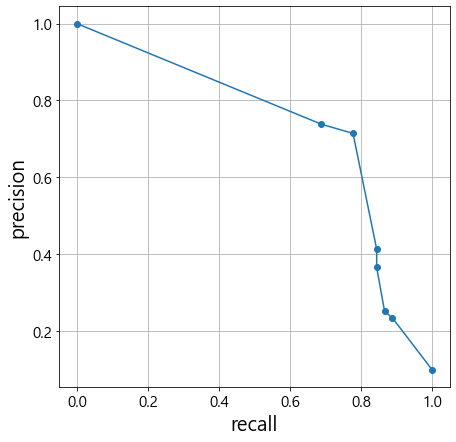

In [100]:
plt.figure(figsize=(7,7))
plt.plot(recalls, precisions, marker ='o')
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.show()

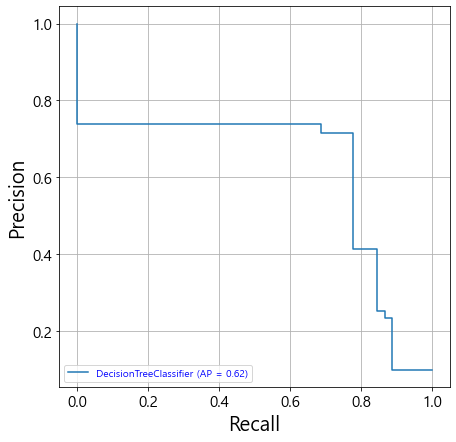

In [107]:
fig,ax = plt.subplots(1,1,figsize =(7,7))
#plt.gca()

plot_precision_recall_curve(tree,
                           X_test,
                           y_test,
                           ax=ax)
plt.grid(True)
plt.show()
#원래는 내부적을 axes 를 만들어 쓰는데, 내가 만든 axes 에 받아서 만들어라

In [105]:
X_test

array([[ 0.,  0.,  5., ...,  2.,  0.,  0.],
       [ 0.,  1., 15., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., 11.,  2.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2., 11., ..., 14.,  2.,  0.],
       [ 0.,  0.,  2., ..., 10.,  0.,  0.]])

In [108]:
average_precision_score(y_test, pos_proba)

0.6213945934390805

In [109]:
#trainset 에 대해 pr curve, ap score

pos_proba_train = tree.predict_proba(X_train)[:,1]

precisions_train, recalls_train, thresholds_train = precision_recall_curve(y_train, pos_proba_train)
thresholds_train = np.append(thresholds_train,1)


In [111]:
pos_proba_train_rf = rf.predict_proba(X_train)[:,1]
precisions_train_rf, recalls_train_rf, thresholds_train_rf = precision_recall_curve(y_train, pos_proba_train_rf)

In [113]:
pd.DataFrame(dict(threshold= thresholds_train, recall = recalls_train, precision=precisions_train))

,threshold,recall,precision
0,0.008434,1.000000,0.100223
1,0.021739,0.948148,0.247582
2,0.029762,0.940741,0.269639
3,0.038462,0.903704,0.402640
4,0.072581,0.896296,0.436823
5,0.520000,0.829630,0.732026
6,0.771654,0.733333,0.773438
7,1.000000,0.007407,1.000000
8,1.000000,0.000000,1.000000


In [115]:
pd.DataFrame(dict(threshold = np.append(thresholds_train_rf,1),recall =recalls_train_rf, precision = precisions_train_rf))

,threshold,recall,precision
0,0.680,1.000000,1.0
1,0.685,0.992593,1.0
2,0.690,0.985185,1.0
3,0.695,0.977778,1.0
4,0.715,0.962963,1.0
5,0.720,0.955556,1.0
6,0.730,0.948148,1.0
7,0.735,0.933333,1.0
8,0.740,0.925926,1.0
9,0.745,0.911111,1.0


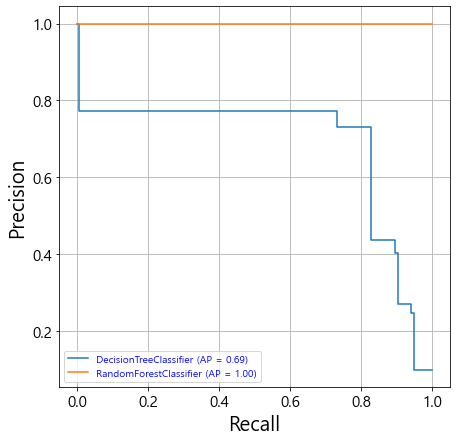

In [116]:
plt.figure(figsize=(7,7))
ax = plt.gca() # 현재 axes get
plot_precision_recall_curve(tree,X_train,y_train, ax = ax)
plot_precision_recall_curve(rf, X_train, y_train, ax = ax)

plt.grid(True)
plt.show()

In [117]:
average_precision_score(y_train, pos_proba_train)

0.6884785157756024

In [118]:
average_precision_score(y_train, pos_proba_train_rf)

1.0